In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical

from matplotlib import pyplot as plt

from encephalon import NN, softmax

import tkinter as tk
from mnist_canvas import DrawingApp

2024-07-31 18:26:27.775596: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-31 18:26:27.780953: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-31 18:26:27.838869: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-31 18:26:28.651726: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def preprocess_data(x, y, limit):
    x = x.reshape(x.shape[0], 1, 28 * 28)
    x = x.astype("float32") / 255
    y = to_categorical(y)
    y = y.reshape(y.shape[0], 1, 10)
    return x[:limit], y[:limit]

def shuffle(x,y):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    return x[indices], y[indices]

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)
x_train, y_train = preprocess_data(x_train, y_train, 100000)
x_test, y_test = preprocess_data(x_test, y_test, 100)

In [4]:
mnist_nn = NN([28*28,40,10],name="mnist", g=softmax)

In [5]:
# mnist_nn.save()

In [6]:
mnist_nn.load("/home/eleve/Dokuments/Prepa/TIPE/mnist_2024-07-26T08:56:10.npz")

In [7]:
# mnist_nn.stochastic(x_train,y_train,100,1000,0.1)

In [8]:
# mnist_nn.train(x_train, y_train, 1000, learning_rate=0.1, saving=False, print_step=10)

pred: 1 	label: 2 	 False


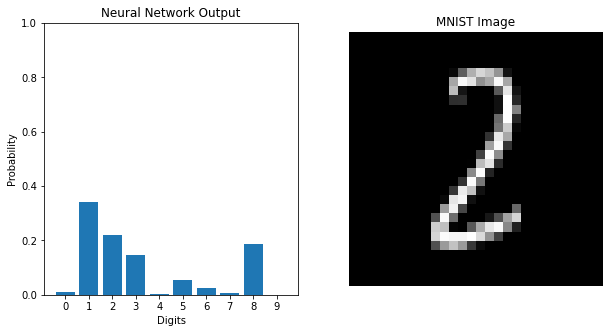

pred: 8 	label: 2 	 False


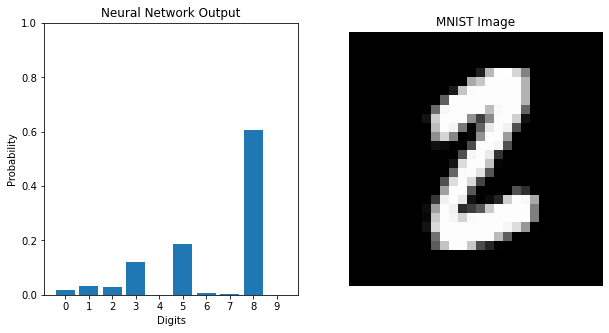

pred: 5 	label: 0 	 False


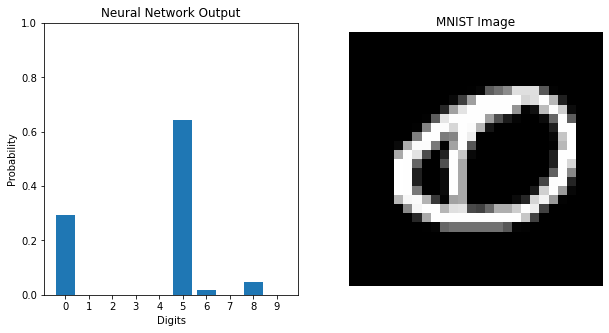

pred: 8 	label: 6 	 False


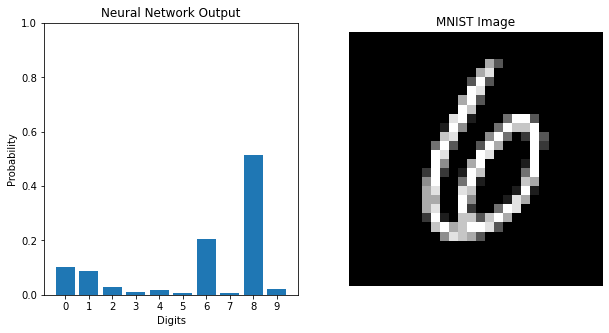

pred: 9 	label: 2 	 False


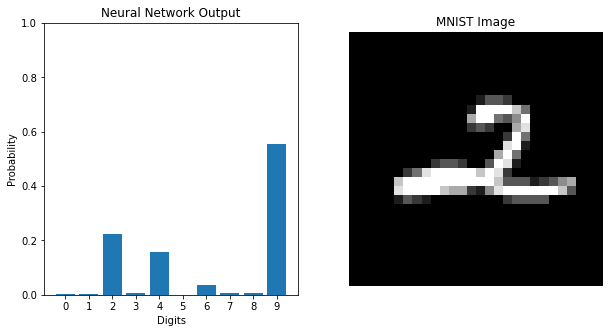

pred: 9 	label: 8 	 False


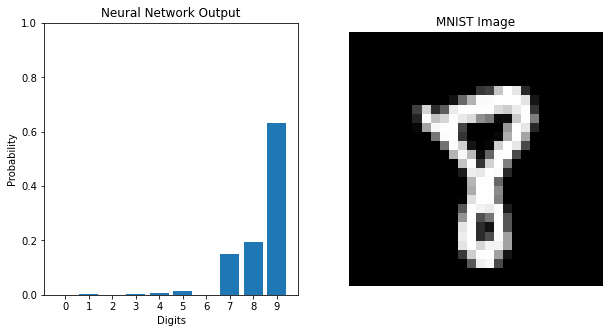

pred: 6 	label: 9 	 False


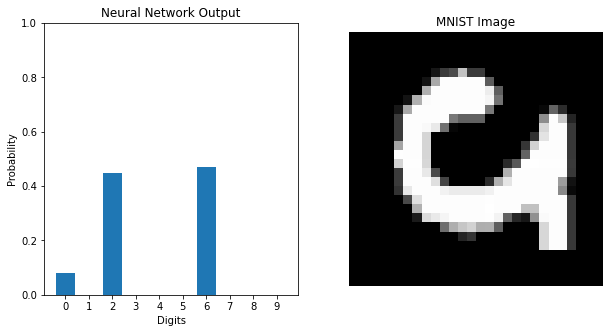

pred: 9 	label: 4 	 False


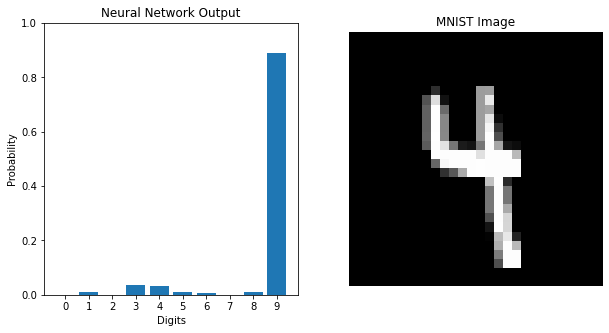

pred: 2 	label: 7 	 False


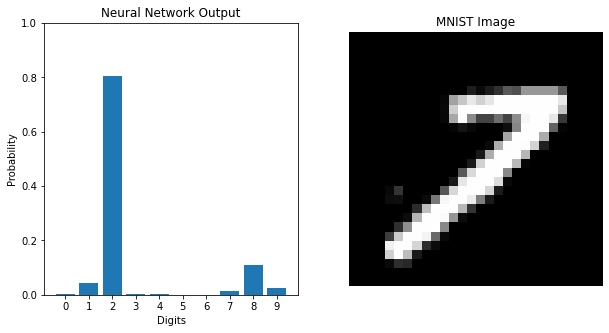

pred: 2 	label: 7 	 False


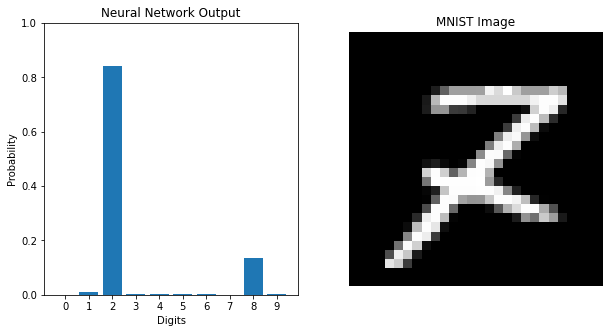

pred: 2 	label: 7 	 False


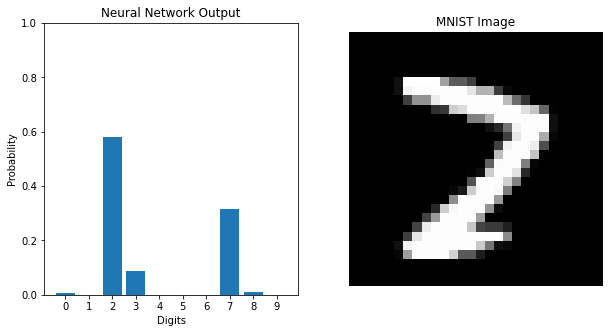

pred: 7 	label: 5 	 False


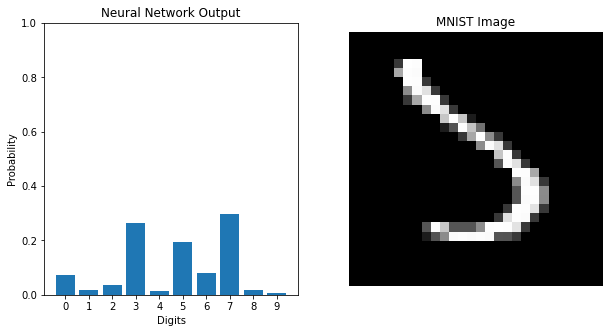

pred: 6 	label: 5 	 False


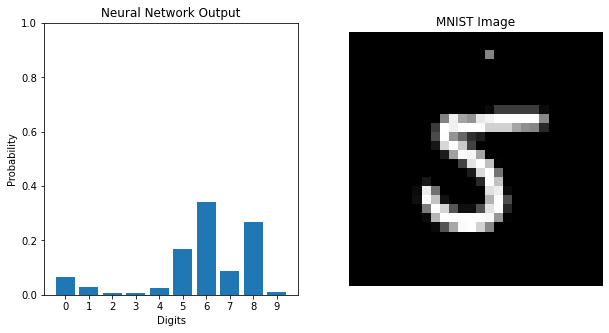

pred: 5 	label: 3 	 False


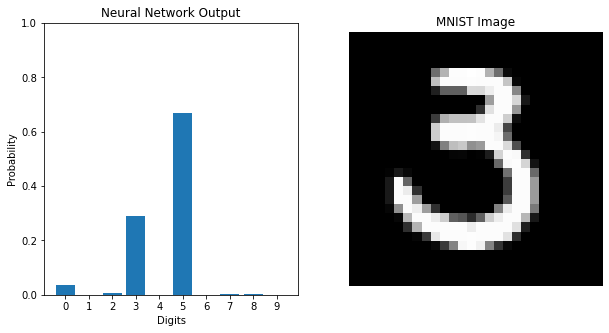

pred: 0 	label: 5 	 False


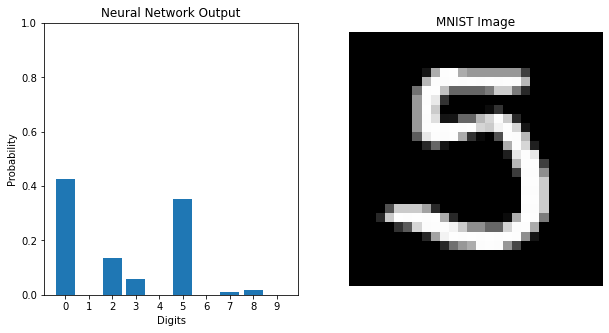

pred: 6 	label: 4 	 False


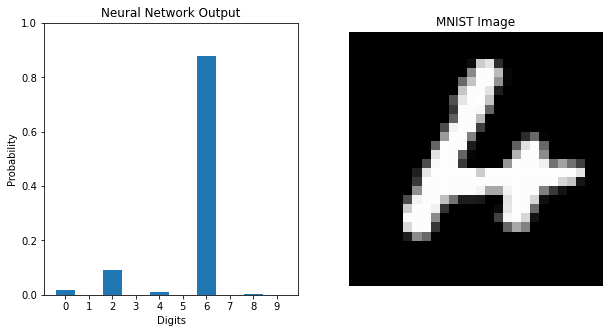

pred: 3 	label: 8 	 False


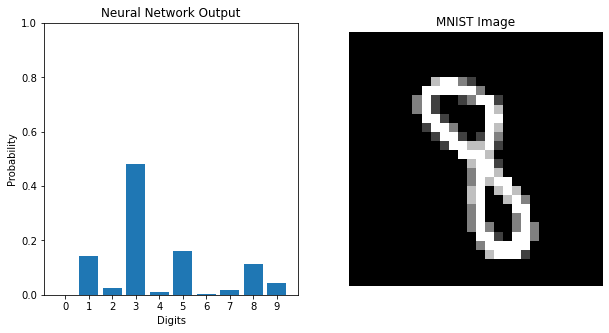

precission:  83.0


In [9]:
n = 0
t = 0
for x, y in zip(x_test, y_test):
    output = mnist_nn.use(x)
    n += 1
    test = np.argmax(output) == np.argmax(y)
    
    if test:
        t += 1
    else:
        print('pred:', np.argmax(output), '\tlabel:', np.argmax(y),'\t', test)

        output = np.squeeze(output)

        fig, axs = plt.subplots(1, 2, figsize=(10, 5))

        axs[0].bar(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], output)
        axs[0].set_title('Neural Network Output')
        axs[0].set_xlabel('Digits')
        axs[0].set_ylabel('Probability')
        axs[0].set_ylim(0, 1)

        current_image = x.reshape((28, 28)) * 255
        axs[1].imshow(current_image, cmap='gray', interpolation='nearest')
        axs[1].set_title('MNIST Image')
        axs[1].axis('off')

    plt.show()
print("precission: ",t/n * 100 )

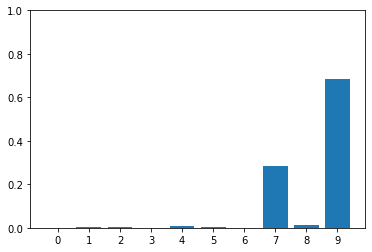

In [10]:
root = tk.Tk()
app = DrawingApp(root, mnist_nn)
root.mainloop()